In [1]:
#Lib Import

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn import linear_model

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


In [2]:
#Read data set:

fifa_df = pd.read_csv("fifa21_male2.csv")
fifa_df.head()

#OVA - Overall Rating
#BOV - Best Overall rating
#BP - Best Position
#POT - Potential 

#ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,
#Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,
#Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,
#Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,
#Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,
#Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,
#Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,
#GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,
#W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,
#CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender



,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


**We start here our first outcome. We want to try to see if we can argue about a player being overpriced or not.**

In [3]:

#Selecting the column that influence market value and not using player statistics. It this will make the dataframe easier to handle

fifa_market_df = fifa_df[["Name", "Age", "Club", "OVA", "BOV", "BP", "POT", "Growth","Position", "Contract", "Loan Date End", "Value", "Wage", "Release Clause"]]
fifa_market_df

,Name,Age,Club,OVA,BOV,BP,POT,Growth,Position,Contract,Loan Date End,Value,Wage,Release Clause
0,G. Pasquale,33,Udinese,69,71,LWB,69,0,LM,2008 ~ 2016,NaN,€625K,€7K,€0
1,Luis García,37,KAS Eupen,71,70,CM,71,0,CM CAM CDM,2014 ~ 2019,NaN,€600K,€7K,€1.1M
2,J. Cole,33,Coventry City,71,71,CAM,71,0,CAM RM RW LM,2016 ~ 2020,NaN,€1.1M,€15K,€0
3,D. Yorke,36,Sunderland,68,70,ST,82,14,NaN,2009,NaN,€0,€0,€0
4,Iniesta,36,Vissel Kobe,81,82,CAM,81,0,CM CAM,2018 ~ 2021,NaN,€5.5M,€12K,€7.2M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,CD Tondela,64,66,CB,69,5,CB,"Jun 30, 2021 On Loan","Jun 30, 2021",€550K,€2K,€0
17121,W. Rickard,18,Burnley,56,58,CAM,66,10,CAM CM,2020 ~ 2021,NaN,€130K,€3K,€273K
17122,C. Barrett,18,Burnley,56,56,RB,67,11,RB,2020 ~ 2022,NaN,€130K,€2K,€273K
17123,J. Gazibegović,20,SK Sturm Graz,62,62,RB,73,11,RB LB,2020 ~ 2023,NaN,€475K,€3K,€784K


We standardize column names

In [4]:
fifa_market_df.columns = [fifa_market_df.columns[i].lower().replace(' ','_') for i in range(len(fifa_market_df.columns))]
fifa_market_df

,name,age,club,ova,bov,bp,pot,growth,position,contract,loan_date_end,value,wage,release_clause
0,G. Pasquale,33,Udinese,69,71,LWB,69,0,LM,2008 ~ 2016,NaN,€625K,€7K,€0
1,Luis García,37,KAS Eupen,71,70,CM,71,0,CM CAM CDM,2014 ~ 2019,NaN,€600K,€7K,€1.1M
2,J. Cole,33,Coventry City,71,71,CAM,71,0,CAM RM RW LM,2016 ~ 2020,NaN,€1.1M,€15K,€0
3,D. Yorke,36,Sunderland,68,70,ST,82,14,NaN,2009,NaN,€0,€0,€0
4,Iniesta,36,Vissel Kobe,81,82,CAM,81,0,CM CAM,2018 ~ 2021,NaN,€5.5M,€12K,€7.2M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,CD Tondela,64,66,CB,69,5,CB,"Jun 30, 2021 On Loan","Jun 30, 2021",€550K,€2K,€0
17121,W. Rickard,18,Burnley,56,58,CAM,66,10,CAM CM,2020 ~ 2021,NaN,€130K,€3K,€273K
17122,C. Barrett,18,Burnley,56,56,RB,67,11,RB,2020 ~ 2022,NaN,€130K,€2K,€273K
17123,J. Gazibegović,20,SK Sturm Graz,62,62,RB,73,11,RB LB,2020 ~ 2023,NaN,€475K,€3K,€784K


In [5]:
#Checking for Nans
fifa_market_df.isna().sum()

name                  0
age                   0
club                 23
ova                   0
bov                   0
bp                    0
pot                   0
growth                0
position            413
contract              0
loan_date_end     16215
value                 0
wage                  0
release_clause        0
dtype: int64

In [6]:
fifa_market_df["loan_date_end"].fillna("Not on Loan", inplace=True)
fifa_market_df.dropna(subset = ["position"], inplace= True)
fifa_market_df["club"].fillna("Without club", inplace=True)

In [7]:
'''
We want to avoig NaNs values:
    1.We fill NaNs with Not on Loan in the column Loan Date End
    2.We fill NaNs with Without club in the column Club
    --> We don't ecptect thes 2 columns to impact the price of a player
    3.We drop the row where the position is empty, we think it can impact the value of the player. Comparing to the full data set, it is 'only' 413 rows on 17000+
'''

"\nWe want to avoig NaNs values:\n    1.We fill NaNs with Not on Loan in the column Loan Date End\n    2.We fill NaNs with Without club in the column Club\n    --> We don't ecptect thes 2 columns to impact the price of a player\n    3.We drop the row where the position is empty, we think it can impact the value of the player. Comparing to the full data set, it is 'only' 413 rows on 17000+\n"

In [8]:
fifa_market_df.isna().sum()

name              0
age               0
club              0
ova               0
bov               0
bp                0
pot               0
growth            0
position          0
contract          0
loan_date_end     0
value             0
wage              0
release_clause    0
dtype: int64

We check again that we do not have empty values

In [9]:
fifa_market_sorted = fifa_market_df.sort_values(by="value", ascending=False)
fifa_market_sorted

,name,age,club,ova,bov,bp,pot,growth,position,contract,loan_date_end,value,wage,release_clause
5417,C. McGregor,27,Celtic,77,78,LWB,78,1,CDM CM,2009 ~ 2024,Not on Loan,€9M,€47K,€16.9M
3428,K. Malcuit,28,Napoli,78,78,RB,78,0,RB RM,2018 ~ 2022,Not on Loan,€9M,€57K,€15.3M
11777,R. Yaremchuk,24,KAA Gent,75,77,ST,79,4,ST LW,2017 ~ 2023,Not on Loan,€9M,€21K,€14.2M
4540,N. Füllkrug,27,SV Werder Bremen,76,77,ST,77,1,ST,2019 ~ 2023,Not on Loan,€9M,€29K,€16M
3724,J. Lundstram,26,Sheffield United,76,78,CM,78,2,CM,2017 ~ 2021,Not on Loan,€9M,€34K,€17.8M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13867,H. Al Mansoury,24,Without club,58,58,GK,65,7,GK,United Arab Emirates Free,Not on Loan,€0,€0,€0
4733,A. Giannou,30,Australia,70,70,ST,70,0,ST,Free,Not on Loan,€0,€0,€0
8702,M. Degenek,26,Australia,73,75,CB,78,5,CB CDM,Free,Not on Loan,€0,€0,€0
3881,K. Simon,29,Hungary,66,66,RM,66,0,RM LM,Free,Not on Loan,€0,€0,€0


We set the data set ordered by player value. 

In [10]:
fifa_market_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 5417 to 367
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            16712 non-null  object
 1   age             16712 non-null  int64 
 2   club            16712 non-null  object
 3   ova             16712 non-null  int64 
 4   bov             16712 non-null  int64 
 5   bp              16712 non-null  object
 6   pot             16712 non-null  int64 
 7   growth          16712 non-null  int64 
 8   position        16712 non-null  object
 9   contract        16712 non-null  object
 10  loan_date_end   16712 non-null  object
 11  value           16712 non-null  object
 12  wage            16712 non-null  object
 13  release_clause  16712 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.9+ MB


Values, wage and release clause are object, we need them to be numbers

In [11]:
#Converting the value to a numeric:
def convert_value(value):
    if value.endswith('M'):
        return float(value.replace('€', "").replace('M', "")) * 1000000
    elif value.endswith('K'):
        return float(value.replace('€', "").replace('K', "")) * 1000
    else:
        return float(value.replace('€', ""))


In [12]:

fifa_market_sorted["value"] = fifa_market_sorted["value"].apply(convert_value)
fifa_market_sorted["wage"] = fifa_market_sorted["wage"].apply(convert_value)
fifa_market_sorted["release_clause"] = fifa_market_sorted["release_clause"].apply(convert_value)
fifa_market_sorted.head()

,name,age,club,ova,bov,bp,pot,growth,position,contract,loan_date_end,value,wage,release_clause
5417,C. McGregor,27,Celtic,77,78,LWB,78,1,CDM CM,2009 ~ 2024,Not on Loan,9000000.0,47000.0,16900000.0
3428,K. Malcuit,28,Napoli,78,78,RB,78,0,RB RM,2018 ~ 2022,Not on Loan,9000000.0,57000.0,15300000.0
11777,R. Yaremchuk,24,KAA Gent,75,77,ST,79,4,ST LW,2017 ~ 2023,Not on Loan,9000000.0,21000.0,14200000.0
4540,N. Füllkrug,27,SV Werder Bremen,76,77,ST,77,1,ST,2019 ~ 2023,Not on Loan,9000000.0,29000.0,16000000.0
3724,J. Lundstram,26,Sheffield United,76,78,CM,78,2,CM,2017 ~ 2021,Not on Loan,9000000.0,34000.0,17800000.0


In [13]:
fifa_market_sorted = fifa_market_sorted.sort_values(by="value", ascending=False)
fifa_market_sorted

,name,age,club,ova,bov,bp,pot,growth,position,contract,loan_date_end,value,wage,release_clause
9331,K. Mbappé,21,Paris Saint-Germain,90,91,ST,95,5,ST LW RW,2018 ~ 2022,Not on Loan,105500000.0,160000.0,203100000.0
2650,Neymar Jr,28,Paris Saint-Germain,91,91,LW,91,0,LW CAM,2017 ~ 2022,Not on Loan,90000000.0,270000.0,166500000.0
2871,K. De Bruyne,29,Manchester City,91,91,CAM,91,0,CAM CM,2015 ~ 2023,Not on Loan,87000000.0,370000.0,161000000.0
2287,R. Lewandowski,31,FC Bayern München,91,91,ST,91,0,ST,2014 ~ 2023,Not on Loan,80000000.0,240000.0,132000000.0
5030,S. Mané,28,Liverpool,90,90,LW,90,0,LW,2016 ~ 2023,Not on Loan,78000000.0,250000.0,144300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7796,R. Coetzee,21,South Africa,71,71,CDM,79,8,CB CDM,Free,Not on Loan,0.0,0.0,0.0
13660,C. Añez,23,Bolivia,63,64,RB,68,5,RB,Free,Not on Loan,0.0,0.0,0.0
6135,L. Gasparotto,21,Canada,61,60,CB,71,10,CB,Free,Not on Loan,0.0,0.0,0.0
27,F. Cannavaro,35,Juventus,82,82,CB,89,7,CB,2010,Not on Loan,0.0,0.0,0.0


In [14]:
round(fifa_market_sorted.describe(),2)

,age,ova,bov,pot,growth,value,wage,release_clause
count,16712.00,16712.00,16712.00,16712.00,16712.00,1.671200e+04,16712.00,1.671200e+04
mean,25.07,66.91,67.87,72.56,5.65,2.610639e+06,10547.27,4.667477e+06
std,4.81,6.90,6.67,5.76,5.79,5.428456e+06,21306.47,1.044499e+07
min,16.00,38.00,42.00,47.00,-1.00,0.000000e+00,0.00,0.000000e+00
25%,21.00,62.00,64.00,69.00,0.00,3.750000e+05,1000.00,5.370000e+05
50%,24.00,67.00,68.00,72.00,4.00,8.000000e+05,3000.00,1.300000e+06
75%,28.00,72.00,72.00,76.00,10.00,2.500000e+06,11000.00,4.000000e+06
max,53.00,93.00,93.00,95.00,26.00,1.055000e+08,560000.00,2.031000e+08


Now we want to see the correlation factor.

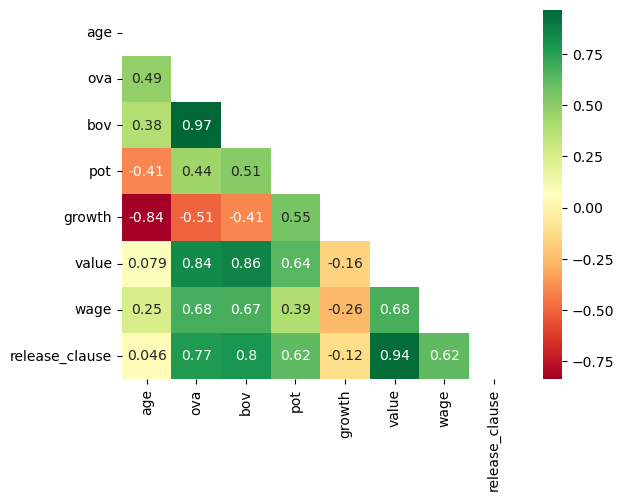

In [15]:
fifa_market_value = fifa_market_sorted[(fifa_market_sorted.value < 25000000) & (fifa_market_sorted.value > 750000)]
fifa_market_value_corr = fifa_market_value.corr(numeric_only = True)

mask = np.zeros_like(fifa_market_value_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(fifa_market_value_corr, mask=mask, annot=True, cmap='RdYlGn')
plt.show()

In [16]:
'''
Comments about correlation factor:
    1. We have reduced the range of values. Using the full range gets us bad one. We decide to use this range as is represent the 'middle class' of players
    2. We are using Pearson correlation factor, which are used for linear regression.
    3. Correlation factor are good for this reduced range
'''

"\nComments about correlation factor:\n    1. We have reduced the range of values. Using the full range gets us bad one. We decide to use this range as is represent the 'middle class' of players\n    2. We are using Pearson correlation factor, which are used for linear regression.\n    3. Correlation factor are good for this reduced range\n"

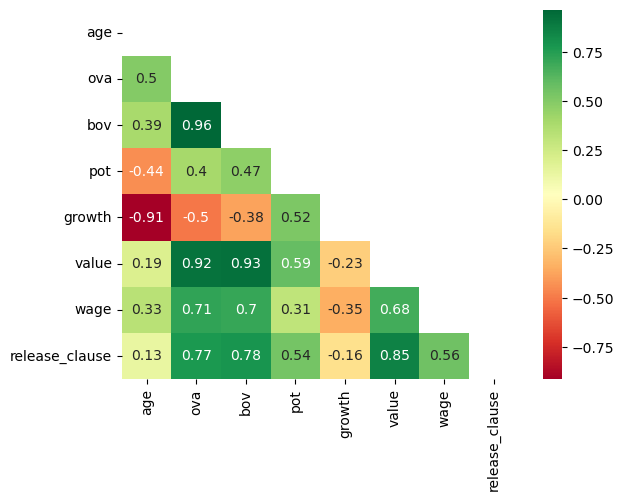

In [17]:
fifa_market_value_corr = fifa_market_value.corr(numeric_only = True, method='spearman')

mask = np.zeros_like(fifa_market_value_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(fifa_market_value_corr, mask=mask, annot=True, cmap='RdYlGn')
plt.show()

In [18]:
'''
We wanted to see the correlation factor of a non linear regression. It is in fact really good and on the full range of player. 
'''

'\nWe wanted to see the correlation factor of a non linear regression. It is in fact really good and on the full range of player. \n'

In [19]:
'''
We now do our linear regression on this reduced range
'''

'\nWe now do our linear regression on this reduced range\n'

In [20]:
fifa_market_value = fifa_market_sorted[(fifa_market_sorted.value < 25000000) & (fifa_market_sorted.value > 750000)].select_dtypes(include='number')
model = linear_model.LinearRegression()
X = fifa_market_value.drop('value', axis = 1)
y = fifa_market_value.value
result = model.fit(X, y)
model.score(X, y)

0.9386760513287263

In [21]:
'''
Our model, based on the feature and the range selected, is validated. But we want to go a bit further, and modify this model to suit our needs for next outcome
'''

'\nOur model, based on the feature and the range selected, is validated. But we want to go a bit further, and modify this model to suit our needs for next outcome\n'

We add two columns, one for when the contract starts, and one for when the contract ends

In [22]:
fifa_market_sorted[['contract_start', "contract_end"]] = fifa_market_sorted['contract'].str.split('~', expand=True)
fifa_market_sorted = fifa_market_sorted.drop('contract', axis=1)
fifa_market_sorted

,name,age,club,ova,bov,bp,pot,growth,position,loan_date_end,value,wage,release_clause,contract_start,contract_end
9331,K. Mbappé,21,Paris Saint-Germain,90,91,ST,95,5,ST LW RW,Not on Loan,105500000.0,160000.0,203100000.0,2018,2022
2650,Neymar Jr,28,Paris Saint-Germain,91,91,LW,91,0,LW CAM,Not on Loan,90000000.0,270000.0,166500000.0,2017,2022
2871,K. De Bruyne,29,Manchester City,91,91,CAM,91,0,CAM CM,Not on Loan,87000000.0,370000.0,161000000.0,2015,2023
2287,R. Lewandowski,31,FC Bayern München,91,91,ST,91,0,ST,Not on Loan,80000000.0,240000.0,132000000.0,2014,2023
5030,S. Mané,28,Liverpool,90,90,LW,90,0,LW,Not on Loan,78000000.0,250000.0,144300000.0,2016,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7796,R. Coetzee,21,South Africa,71,71,CDM,79,8,CB CDM,Not on Loan,0.0,0.0,0.0,Free,None
13660,C. Añez,23,Bolivia,63,64,RB,68,5,RB,Not on Loan,0.0,0.0,0.0,Free,None
6135,L. Gasparotto,21,Canada,61,60,CB,71,10,CB,Not on Loan,0.0,0.0,0.0,Free,None
27,F. Cannavaro,35,Juventus,82,82,CB,89,7,CB,Not on Loan,0.0,0.0,0.0,2010,None


We fill the NaNs with the current year

In [23]:
fifa_market_sorted['contract_end'].fillna(2021, inplace = True)

We want to see wich player have a contract and how many years left on this contract. This will help up to determine who is playing

In [24]:
fifa_market_sorted['contract_end'] = fifa_market_sorted['contract_end'].astype(int)
fifa_market_sorted['years_left'] = fifa_market_sorted['contract_end'].apply(lambda x: x - 2021)
fifa_market_sorted.sort_values(by='years_left', ascending=True)

,name,age,club,ova,bov,bp,pot,growth,position,loan_date_end,value,wage,release_clause,contract_start,contract_end,years_left
3904,Victor Hugo,19,Santos,66,69,RW,75,9,CAM CF,Not on Loan,0.0,0.0,0.0,2010,2011,-10
239,E. van der Sar,39,Manchester United,83,83,GK,87,4,GK,Not on Loan,0.0,0.0,0.0,2005,2011,-10
37,C. Makélelé,37,Paris Saint-Germain,74,74,CDM,81,7,CDM CM,Not on Loan,0.0,0.0,0.0,2008,2011,-10
34,P. Vieira,34,Manchester City,76,77,CDM,87,11,CDM CM,Not on Loan,0.0,0.0,0.0,2010,2011,-10
8,G. Neville B,35,Manchester United,76,78,CB,82,6,RB CB RWB,Not on Loan,0.0,0.0,0.0,1991,2011,-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5267,De Tomás,25,RCD Espanyol,78,80,ST,80,2,ST,Not on Loan,13000000.0,12000.0,20500000.0,2020,2026,5
4971,Saúl,25,Atlético Madrid,84,86,CM,87,3,CM LM LB,Not on Loan,38500000.0,77000.0,81800000.0,2013,2026,5
12361,João Félix,20,Atlético Madrid,81,83,CAM,93,12,CF ST,Not on Loan,32000000.0,51000.0,72000000.0,2019,2026,5
10991,P. Estupiñán,22,Villarreal CF,79,79,LB,86,7,LB,Not on Loan,15500000.0,29000.0,35700000.0,2020,2027,6


We are creating a new dataset with the players with contracts (playing)

In [25]:
fifa_current_playing = fifa_market_sorted[fifa_market_sorted['years_left'] >= 0]


In [26]:
fifa_market_value_range = fifa_current_playing[(fifa_current_playing.value < 30000000) & (fifa_current_playing.value > 10000000)]
fifa_market_value_range

,name,age,club,ova,bov,bp,pot,growth,position,loan_date_end,value,wage,release_clause,contract_start,contract_end,years_left
3277,Pizzi,30,Portugal,84,84,RM,84,0,RM CM,Not on Loan,29500000.0,25000.0,59000000.0,SL Benfica 2013,2023,2
6922,Marco Asensio,24,Real Madrid,82,84,CAM,86,4,LW RW,Not on Loan,29000000.0,160000.0,61600000.0,2015,2023,2
8072,G. Lo Celso,24,Tottenham Hotspur,82,84,CAM,87,5,CM CAM,Not on Loan,29000000.0,95000.0,57300000.0,2020,2025,4
1010,M. Neuer,34,FC Bayern München,89,89,GK,89,0,GK,Not on Loan,29000000.0,125000.0,47900000.0,2011,2023,2
7616,Rúben Neves,23,Wolverhampton Wanderers,82,83,CM,87,5,CM,Not on Loan,29000000.0,89000.0,57300000.0,2017,2023,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,F. Niederlechner,29,FC Augsburg,78,78,ST,78,0,ST,Not on Loan,10500000.0,35000.0,18900000.0,2019,2022,1
10560,R. Koch,23,Leeds United,76,78,CB,84,8,CB CDM,Not on Loan,10500000.0,64000.0,23100000.0,2020,2024,3
5098,F. Mollet,28,Montpellier HSC,78,78,CAM,78,0,CAM,Not on Loan,10500000.0,36000.0,21000000.0,2018,2023,2
4006,D. da Costa,26,Eintracht Frankfurt,78,78,RWB,79,1,RWB RM RB,Not on Loan,10500000.0,28000.0,18600000.0,2017,2022,1


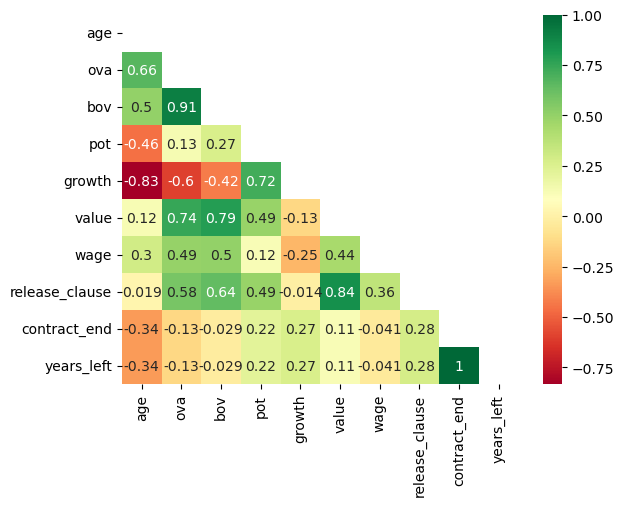

In [27]:
fifa_market_value_corr = fifa_market_value_range.corr(numeric_only = True)

mask = np.zeros_like(fifa_market_value_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(fifa_market_value_corr, mask=mask, annot=True, cmap='RdYlGn')
plt.show()

Intercept: 74.94889641618224
Coefficient: 3.487679916246486e-07
Score:  0.6208637156971044


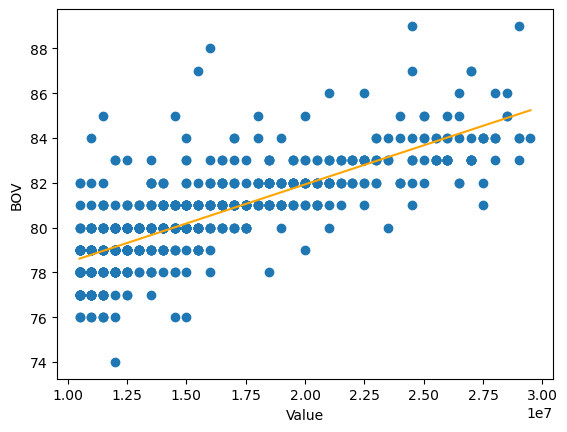

In [28]:
model_2 = linear_model.LinearRegression()
x = fifa_market_value_range[["value"]]
y = fifa_market_value_range["bov"]
result = model.fit(x, y)
print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_[0])
print('Score: ', model.score(x,y))

regression_line_value_10_30 = result.intercept_ + fifa_market_value_range.value * result.coef_[0]


plt.plot(fifa_market_value_range.value, regression_line_value_10_30, c="orange")
plt.scatter(x=fifa_market_value_range.value, y=fifa_market_value_range.bov)
plt.xlabel("Value")
plt.ylabel("BOV")
plt.show()

In [29]:
model.fit(fifa_market_value_range[['bov']], fifa_market_value_range['value'])

predicted_value = model.predict(fifa_market_value_range[['bov']])

fifa_market_value_range['predicted_value'] = predicted_value
pd.set_option('display.float_format', '{:.2f}'.format)
fifa_market_value_range

,name,age,club,ova,bov,bp,pot,growth,position,loan_date_end,value,wage,release_clause,contract_start,contract_end,years_left,predicted_value
3277,Pizzi,30,Portugal,84,84,RM,84,0,RM CM,Not on Loan,29500000.00,25000.00,59000000.00,SL Benfica 2013,2023,2,22018472.73
6922,Marco Asensio,24,Real Madrid,82,84,CAM,86,4,LW RW,Not on Loan,29000000.00,160000.00,61600000.00,2015,2023,2,22018472.73
8072,G. Lo Celso,24,Tottenham Hotspur,82,84,CAM,87,5,CM CAM,Not on Loan,29000000.00,95000.00,57300000.00,2020,2025,4,22018472.73
1010,M. Neuer,34,FC Bayern München,89,89,GK,89,0,GK,Not on Loan,29000000.00,125000.00,47900000.00,2011,2023,2,30919285.45
7616,Rúben Neves,23,Wolverhampton Wanderers,82,83,CM,87,5,CM,Not on Loan,29000000.00,89000.00,57300000.00,2017,2023,2,20238310.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,F. Niederlechner,29,FC Augsburg,78,78,ST,78,0,ST,Not on Loan,10500000.00,35000.00,18900000.00,2019,2022,1,11337497.45
10560,R. Koch,23,Leeds United,76,78,CB,84,8,CB CDM,Not on Loan,10500000.00,64000.00,23100000.00,2020,2024,3,11337497.45
5098,F. Mollet,28,Montpellier HSC,78,78,CAM,78,0,CAM,Not on Loan,10500000.00,36000.00,21000000.00,2018,2023,2,11337497.45
4006,D. da Costa,26,Eintracht Frankfurt,78,78,RWB,79,1,RWB RM RB,Not on Loan,10500000.00,28000.00,18600000.00,2017,2022,1,11337497.45


In [30]:
fifa_market_value_range['ratio'] = fifa_market_value_range.value / fifa_market_value_range.predicted_value
fifa_market_value_range

,name,age,club,ova,bov,bp,pot,growth,position,loan_date_end,value,wage,release_clause,contract_start,contract_end,years_left,predicted_value,ratio
3277,Pizzi,30,Portugal,84,84,RM,84,0,RM CM,Not on Loan,29500000.00,25000.00,59000000.00,SL Benfica 2013,2023,2,22018472.73,1.34
6922,Marco Asensio,24,Real Madrid,82,84,CAM,86,4,LW RW,Not on Loan,29000000.00,160000.00,61600000.00,2015,2023,2,22018472.73,1.32
8072,G. Lo Celso,24,Tottenham Hotspur,82,84,CAM,87,5,CM CAM,Not on Loan,29000000.00,95000.00,57300000.00,2020,2025,4,22018472.73,1.32
1010,M. Neuer,34,FC Bayern München,89,89,GK,89,0,GK,Not on Loan,29000000.00,125000.00,47900000.00,2011,2023,2,30919285.45,0.94
7616,Rúben Neves,23,Wolverhampton Wanderers,82,83,CM,87,5,CM,Not on Loan,29000000.00,89000.00,57300000.00,2017,2023,2,20238310.18,1.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,F. Niederlechner,29,FC Augsburg,78,78,ST,78,0,ST,Not on Loan,10500000.00,35000.00,18900000.00,2019,2022,1,11337497.45,0.93
10560,R. Koch,23,Leeds United,76,78,CB,84,8,CB CDM,Not on Loan,10500000.00,64000.00,23100000.00,2020,2024,3,11337497.45,0.93
5098,F. Mollet,28,Montpellier HSC,78,78,CAM,78,0,CAM,Not on Loan,10500000.00,36000.00,21000000.00,2018,2023,2,11337497.45,0.93
4006,D. da Costa,26,Eintracht Frankfurt,78,78,RWB,79,1,RWB RM RB,Not on Loan,10500000.00,28000.00,18600000.00,2017,2022,1,11337497.45,0.93


A ratio of 1 means the plaers is at a good price, above 1 overpriced and below 1 undervalued

**Here comes our second outcome. We are a data analyst in a football club, and the top managment is asking us whom we should get rid off and whom we should buy instead

In [31]:
#Select the column that influence market value:
fifa_df = pd.read_csv("fifa21_male2.csv")
fifa_market_df = fifa_df[[
    "Name", "Age", "Club", "OVA", "BOV", "BP", "POT", "Growth", "Position", "Contract", "Loan Date End",
    "Value", "Wage", "Release Clause", "Attacking", "Skill", "Movement", "Power", "Defending"]]
fifa_market_df

,Name,Age,Club,OVA,BOV,BP,POT,Growth,Position,Contract,Loan Date End,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Defending
0,G. Pasquale,33,Udinese,69,71,LWB,69,0,LM,2008 ~ 2016,NaN,€625K,€7K,€0,313,338,347,347,208
1,Luis García,37,KAS Eupen,71,70,CM,71,0,CM CAM CDM,2014 ~ 2019,NaN,€600K,€7K,€1.1M,337,369,305,324,153
2,J. Cole,33,Coventry City,71,71,CAM,71,0,CAM RM RW LM,2016 ~ 2020,NaN,€1.1M,€15K,€0,337,387,295,284,99
3,D. Yorke,36,Sunderland,68,70,ST,82,14,NaN,2009,NaN,€0,€0,€0,264,255,176,239,75
4,Iniesta,36,Vissel Kobe,81,82,CAM,81,0,CM CAM,2018 ~ 2021,NaN,€5.5M,€12K,€7.2M,367,408,346,297,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,CD Tondela,64,66,CB,69,5,CB,"Jun 30, 2021 On Loan","Jun 30, 2021",€550K,€2K,€0,197,193,243,279,198
17121,W. Rickard,18,Burnley,56,58,CAM,66,10,CAM CM,2020 ~ 2021,NaN,€130K,€3K,€273K,248,264,298,271,132
17122,C. Barrett,18,Burnley,56,56,RB,67,11,RB,2020 ~ 2022,NaN,€130K,€2K,€273K,218,212,308,233,163
17123,J. Gazibegović,20,SK Sturm Graz,62,62,RB,73,11,RB LB,2020 ~ 2023,NaN,€475K,€3K,€784K,223,258,349,261,180


Data cleaning

In [32]:
fifa_market_df["Loan Date End"].fillna("Not on Loan", inplace=True)
fifa_market_df["Position"].fillna("Sub or Reserv", inplace=True)

In [33]:
fifa_market_df.isna().sum()

Name               0
Age                0
Club              23
OVA                0
BOV                0
BP                 0
POT                0
Growth             0
Position           0
Contract           0
Loan Date End      0
Value              0
Wage               0
Release Clause     0
Attacking          0
Skill              0
Movement           0
Power              0
Defending          0
dtype: int64

In [34]:
fifa_market_df["Release Clause"] = fifa_market_df["Release Clause"].apply(convert_value)
fifa_market_df["Value"] = fifa_market_df["Value"].apply(convert_value)
fifa_market_df["Wage"] = fifa_market_df["Wage"].apply(convert_value)
fifa_market_df.head()

,Name,Age,Club,OVA,BOV,BP,POT,Growth,Position,Contract,Loan Date End,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Defending
0,G. Pasquale,33,Udinese,69,71,LWB,69,0,LM,2008 ~ 2016,Not on Loan,625000.00,7000.00,0.00,313,338,347,347,208
1,Luis García,37,KAS Eupen,71,70,CM,71,0,CM CAM CDM,2014 ~ 2019,Not on Loan,600000.00,7000.00,1100000.00,337,369,305,324,153
2,J. Cole,33,Coventry City,71,71,CAM,71,0,CAM RM RW LM,2016 ~ 2020,Not on Loan,1100000.00,15000.00,0.00,337,387,295,284,99
3,D. Yorke,36,Sunderland,68,70,ST,82,14,Sub or Reserv,2009,Not on Loan,0.00,0.00,0.00,264,255,176,239,75
4,Iniesta,36,Vissel Kobe,81,82,CAM,81,0,CM CAM,2018 ~ 2021,Not on Loan,5500000.00,12000.00,7200000.00,367,408,346,297,181


Selection of our team

In [35]:
condition_team = fifa_market_df["Club"] == "Sevilla FC"
fifa_market_sorted_sevilla_df = fifa_market_df[condition_team]
fifa_market_sorted_sevilla_df = fifa_market_sorted_sevilla_df.sort_values(by='Age', ascending=False)
fifa_market_sorted_sevilla_df

,Name,Age,Club,OVA,BOV,BP,POT,Growth,Position,Contract,Loan Date End,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Defending
569,Jesús Navas,34,Sevilla FC,84,84,RB,84,0,RB RM,2017 ~ 2021,Not on Loan,11000000.00,43000.00,23100000.00,380,370,423,328,239
1925,Fernando,32,Sevilla FC,83,83,CDM,83,0,CDM CM,2019 ~ 2022,Not on Loan,17000000.00,39000.00,35700000.00,329,345,345,383,247
1061,I. Rakitić,32,Sevilla FC,82,82,CM,82,0,CM,2020 ~ 2024,Not on Loan,17000000.00,39000.00,35700000.00,386,416,333,340,225
1888,G. Mercado,31,Sevilla FC,79,78,CB,79,0,CB RB,2016 ~ 2019,Not on Loan,8500000.00,20000.00,17900000.00,341,313,348,361,235
4289,T. Vaclík,31,Sevilla FC,82,82,GK,82,0,GK,2018 ~ 2021,Not on Loan,14000000.00,29000.00,29400000.00,78,105,244,257,56
4320,Roque Mesa,31,Sevilla FC,77,78,CDM,77,0,CM CDM,2018 ~ 2021,Not on Loan,7500000.00,27000.00,15800000.00,286,333,374,352,229
4799,F. Vázquez,31,Sevilla FC,77,78,CAM,77,0,CM CAM LM,2016 ~ 2021,Not on Loan,7500000.00,27000.00,15800000.00,382,391,273,342,157
1477,B. Trémoulinas,30,Sevilla FC,81,81,LB,81,0,LB,2014 ~ 2017,Not on Loan,11500000.00,20000.00,0.00,339,373,405,363,240
2845,Escudero,30,Sevilla FC,80,80,LB,80,0,LB LM,2015 ~ 2021,Not on Loan,11500000.00,31000.00,24200000.00,335,360,365,359,238
4021,Aleix Vidal,30,Sevilla FC,77,77,RM,77,0,RM LM,2018 ~ 2022,Not on Loan,8500000.00,27000.00,17900000.00,332,339,391,351,219


New column to see if players are at end of contract:

In [36]:
fifa_market_sorted_sevilla_df[['Contract start', "Contract end"]] = fifa_market_sorted_sevilla_df['Contract'].str.split('~', expand=True)
fifa_market_sorted_sevilla_df = fifa_market_sorted_sevilla_df.drop('Contract', axis=1)
fifa_market_sorted_sevilla_df = fifa_market_sorted_sevilla_df.drop('Loan Date End', axis=1)
fifa_market_sorted_sevilla_df = fifa_market_sorted_sevilla_df.drop('Contract start', axis=1)
fifa_market_sorted_sevilla_df['Contract end'] = fifa_market_sorted_sevilla_df['Contract end'].astype(int)
fifa_market_sorted_sevilla_df['Years left'] = fifa_market_sorted_sevilla_df['Contract end'].apply(lambda x: x - 2021)

#drop the ones that stoped playing for sevilha:
fifa_market_sorted_sevilla_df = fifa_market_sorted_sevilla_df.loc[fifa_market_sorted_sevilla_df['Years left'] >= 0]


fifa_market_sorted_sevilla_df.sort_values(by='Years left', ascending=True)

,Name,Age,Club,OVA,BOV,BP,POT,Growth,Position,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Defending,Contract end,Years left
569,Jesús Navas,34,Sevilla FC,84,84,RB,84,0,RB RM,11000000.00,43000.00,23100000.00,380,370,423,328,239,2021,0
11835,Genaro,22,Sevilla FC,60,62,CM,70,10,CM CB,325000.00,3000.00,748000.00,256,276,320,287,169,2021,0
10628,Pepe Mena,22,Sevilla FC,63,64,CM,73,10,CDM CM CAM,550000.00,4000.00,1300000.00,256,295,298,240,195,2021,0
10438,Javi Díaz,23,Sevilla FC,65,65,GK,75,10,GK,675000.00,4000.00,1600000.00,76,119,283,213,40,2021,0
11846,Javi Vázquez,19,Sevilla FC,61,62,LWB,74,13,LWB LB,425000.00,2000.00,1200000.00,249,207,285,250,184,2021,0
2698,S. Corchia,29,Sevilla FC,75,75,RB,75,0,RB,5500000.00,23000.00,11600000.00,337,381,361,336,226,2021,0
16172,Pablo Pérez,18,Sevilla FC,61,61,LB,74,13,LB LM,400000.00,1000.00,1100000.00,226,226,332,243,172,2021,0
4799,F. Vázquez,31,Sevilla FC,77,78,CAM,77,0,CM CAM LM,7500000.00,27000.00,15800000.00,382,391,273,342,157,2021,0
4289,T. Vaclík,31,Sevilla FC,82,82,GK,82,0,GK,14000000.00,29000.00,29400000.00,78,105,244,257,56,2021,0
4320,Roque Mesa,31,Sevilla FC,77,78,CDM,77,0,CM CDM,7500000.00,27000.00,15800000.00,286,333,374,352,229,2021,0


Players at the end of contract that we need to do something about:

Players marked green dont feet the team. low or zero POT.

Player marked yellow does not want to renovate. All others we should keep.

![Alt text](<Screenshot 2023-09-17 at 17.47.11.png>)

Player to sell or make new contract:
Transfer budget - €34.5M
Club worth - €540M

In [37]:
fifa_market_sorted_sevilla_contract_zero_df = fifa_market_sorted_sevilla_df[fifa_market_sorted_sevilla_df['Years left'] == 0 ]
fifa_market_sorted_sevilla_contract_zero_df.sort_values(by='Value', ascending=True)

,Name,Age,Club,OVA,BOV,BP,POT,Growth,Position,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Defending,Contract end,Years left
11835,Genaro,22,Sevilla FC,60,62,CM,70,10,CM CB,325000.00,3000.00,748000.00,256,276,320,287,169,2021,0
16172,Pablo Pérez,18,Sevilla FC,61,61,LB,74,13,LB LM,400000.00,1000.00,1100000.00,226,226,332,243,172,2021,0
11846,Javi Vázquez,19,Sevilla FC,61,62,LWB,74,13,LWB LB,425000.00,2000.00,1200000.00,249,207,285,250,184,2021,0
10628,Pepe Mena,22,Sevilla FC,63,64,CM,73,10,CDM CM CAM,550000.00,4000.00,1300000.00,256,295,298,240,195,2021,0
10438,Javi Díaz,23,Sevilla FC,65,65,GK,75,10,GK,675000.00,4000.00,1600000.00,76,119,283,213,40,2021,0
2698,S. Corchia,29,Sevilla FC,75,75,RB,75,0,RB,5500000.00,23000.00,11600000.00,337,381,361,336,226,2021,0
4320,Roque Mesa,31,Sevilla FC,77,78,CDM,77,0,CM CDM,7500000.00,27000.00,15800000.00,286,333,374,352,229,2021,0
4799,F. Vázquez,31,Sevilla FC,77,78,CAM,77,0,CM CAM LM,7500000.00,27000.00,15800000.00,382,391,273,342,157,2021,0
569,Jesús Navas,34,Sevilla FC,84,84,RB,84,0,RB RM,11000000.00,43000.00,23100000.00,380,370,423,328,239,2021,0
2845,Escudero,30,Sevilla FC,80,80,LB,80,0,LB LM,11500000.00,31000.00,24200000.00,335,360,365,359,238,2021,0


In [38]:
fifa_market_sorted_sevilla_contract_zero_df = fifa_market_sorted_sevilla_df[(fifa_market_sorted_sevilla_df['Years left'] == 0) & (fifa_market_sorted_sevilla_df['Growth'] < 10)]
fifa_market_sorted_sevilla_contract_zero_df

,Name,Age,Club,OVA,BOV,BP,POT,Growth,Position,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Defending,Contract end,Years left
569,Jesús Navas,34,Sevilla FC,84,84,RB,84,0,RB RM,11000000.00,43000.00,23100000.00,380,370,423,328,239,2021,0
4289,T. Vaclík,31,Sevilla FC,82,82,GK,82,0,GK,14000000.00,29000.00,29400000.00,78,105,244,257,56,2021,0
4320,Roque Mesa,31,Sevilla FC,77,78,CDM,77,0,CM CDM,7500000.00,27000.00,15800000.00,286,333,374,352,229,2021,0
4799,F. Vázquez,31,Sevilla FC,77,78,CAM,77,0,CM CAM LM,7500000.00,27000.00,15800000.00,382,391,273,342,157,2021,0
2845,Escudero,30,Sevilla FC,80,80,LB,80,0,LB LM,11500000.00,31000.00,24200000.00,335,360,365,359,238,2021,0
2698,S. Corchia,29,Sevilla FC,75,75,RB,75,0,RB,5500000.00,23000.00,11600000.00,337,381,361,336,226,2021,0


Players that are in end of contract and its not worth to make new one. and Escudero wants to get out.

In [39]:
players_to_sub_sevilha_df = fifa_market_sorted_sevilla_contract_zero_df[fifa_market_sorted_sevilla_contract_zero_df['OVA'] <= 80]
players_to_sub_sevilha_df

,Name,Age,Club,OVA,BOV,BP,POT,Growth,Position,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Defending,Contract end,Years left
4320,Roque Mesa,31,Sevilla FC,77,78,CDM,77,0,CM CDM,7500000.00,27000.00,15800000.00,286,333,374,352,229,2021,0
4799,F. Vázquez,31,Sevilla FC,77,78,CAM,77,0,CM CAM LM,7500000.00,27000.00,15800000.00,382,391,273,342,157,2021,0
2845,Escudero,30,Sevilla FC,80,80,LB,80,0,LB LM,11500000.00,31000.00,24200000.00,335,360,365,359,238,2021,0
2698,S. Corchia,29,Sevilla FC,75,75,RB,75,0,RB,5500000.00,23000.00,11600000.00,337,381,361,336,226,2021,0


Plot the stats:

In [40]:
#columns_to_multiply = ["Attacking", "Skill", "Movement", "Power", "Defending"]
#players_to_sub_sevilha_df[columns_to_multiply] = players_to_sub_sevilha_df[columns_to_multiply] * 0.5

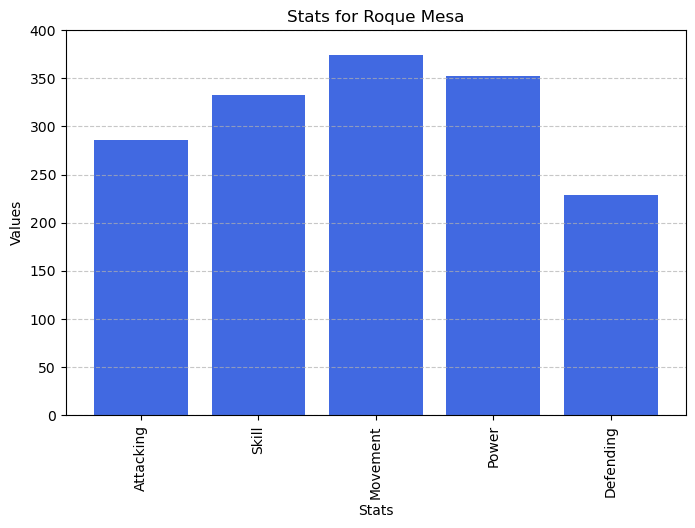

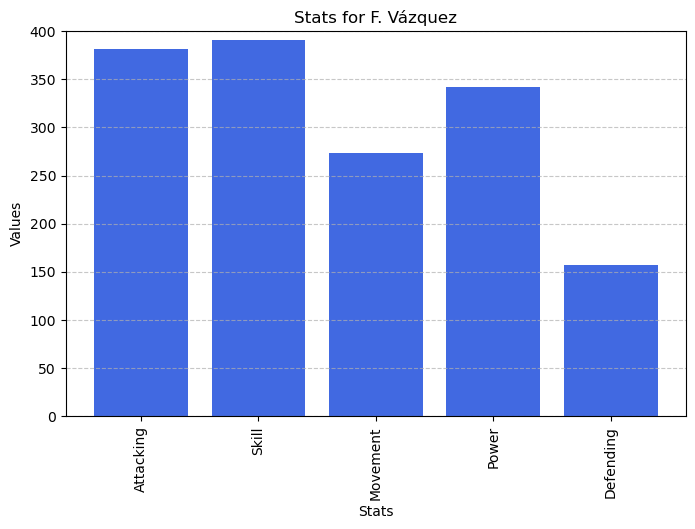

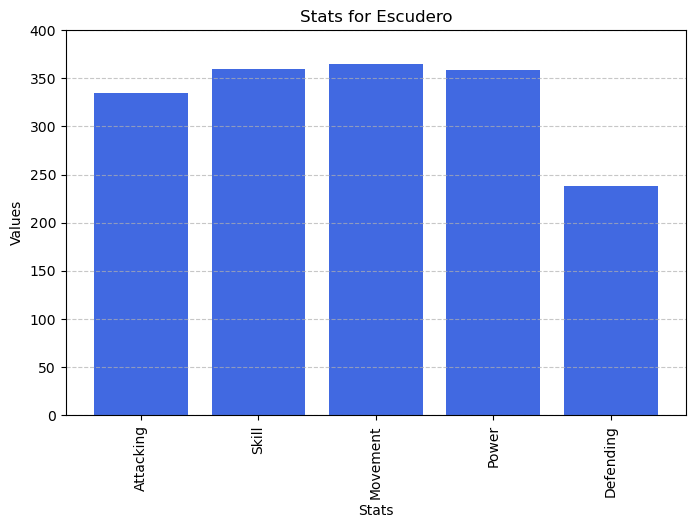

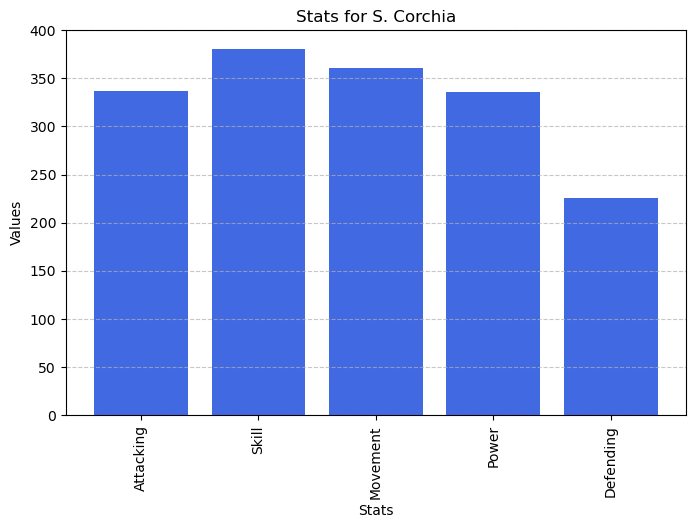

In [41]:
players_to_sub_sevilha = ['Roque Mesa', 'F. Vázquez', 'Escudero', "S. Corchia"]
for player_name in players_to_sub_sevilha:
    player_stats = players_to_sub_sevilha_df[players_to_sub_sevilha_df['Name'] == player_name]
    
    stat_columns = ["Attacking", "Skill", "Movement", "Power", "Defending"]
    player_stats_values = player_stats[stat_columns].values[0]
    
    plt.figure(figsize=(8, 5))
    plt.bar(stat_columns, player_stats_values, color='royalblue')
    plt.xlabel('Stats')
    plt.ylabel('Values')
    plt.title(f'Stats for {player_name}')
    plt.ylim(0, 400) 
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=90)
    plt.show()

After getting possible subs, we use this plot to compare them to the ones that we want to subs

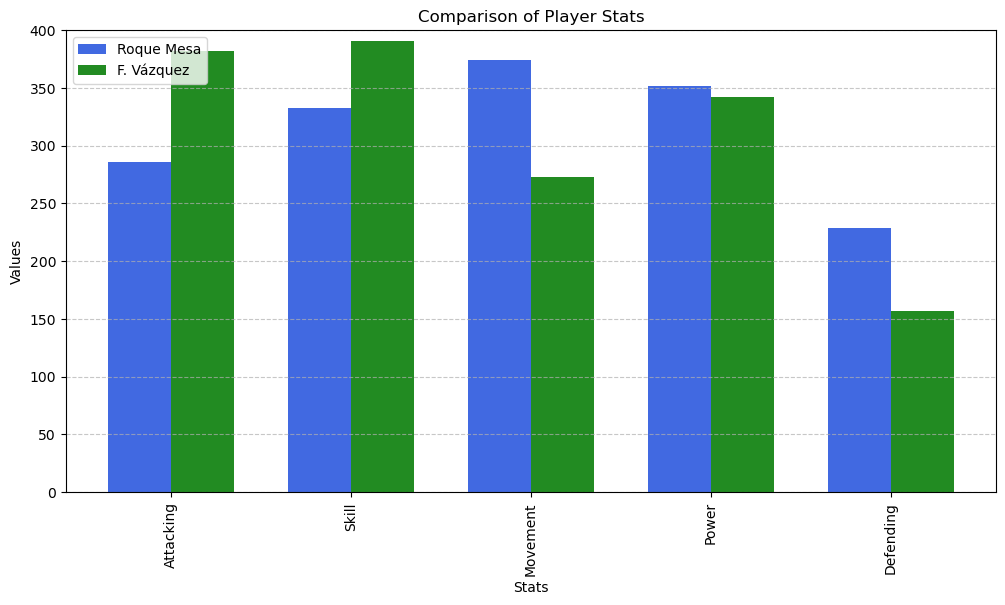

In [42]:
players_to_sub_sevilha_comp = ['Roque Mesa', 'F. Vázquez']
colors = ['royalblue', 'forestgreen'] 

stat_columns = ["Attacking", "Skill", "Movement", "Power", "Defending"]


x = np.arange(len(stat_columns))

plt.figure(figsize=(12, 6))
for i, player_name in enumerate(players_to_sub_sevilha_comp):
    player_stats = players_to_sub_sevilha_df[players_to_sub_sevilha_df['Name'] == player_name]
    player_stats_values = player_stats[stat_columns].values[0]
    
    width = 0.35

    x_player = x + i * width
    
    plt.bar(x_player, player_stats_values, width=width, label=player_name, color=colors[i])

plt.xlabel('Stats')
plt.xticks(x + width / 2, stat_columns, rotation=90)

plt.ylabel('Values')
plt.title('Comparison of Player Stats')
plt.ylim(0, 400) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')

plt.show()

In [43]:
fifa_df = pd.read_csv("fifa21_male2.csv")
fifa_market_2021_df = fifa_df[[
    "Name", "Age", "Club", "OVA", "BOV", "BP", "POT", "Growth", "Position", "Contract", "Loan Date End",
    "Value", "Wage", "Release Clause", "Attacking", "Skill", "Movement", "Power", "Defending"]]


In [44]:
#filling nan:
fifa_market_2021_df["Loan Date End"].fillna("Not on Loan", inplace=True)
fifa_market_2021_df.dropna(subset = ["Position"], inplace= True)
fifa_market_2021_df["Club"].fillna("Without club", inplace=True)

In [45]:
fifa_market_2021_df["Value"] = fifa_market_2021_df["Value"].apply(convert_value)
fifa_market_2021_df["Wage"] = fifa_market_2021_df["Wage"].apply(convert_value)
fifa_market_2021_df["Release Clause"] = fifa_market_2021_df["Release Clause"].apply(convert_value)
fifa_market_2021_df.drop("Loan Date End", axis=1, inplace=True)


fifa_market_2021_df[['Contract start', "Contract end"]] = fifa_market_2021_df['Contract'].str.split('~', expand=True)
fifa_market_2021_df.drop("Contract start", axis=1, inplace=True)
#fifa_market_2021_df = fifa_market_2021_df.drop('Contract', axis=1)

fifa_market_2021_df['Contract end'] = fifa_market_2021_df['Contract end'].astype(float)

fifa_market_2021_df['Years left'] = fifa_market_2021_df['Contract end'].apply(lambda x: x - 2021)
fifa_market_2021_df.sort_values(by='Years left', ascending=True)

,Name,Age,Club,OVA,BOV,BP,POT,Growth,Position,Contract,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Defending,Contract end,Years left
2309,S. Mehamha,19,Olympique Lyonnais,57,57,CDM,76,19,CDM CM,2008 ~ 2011,0.00,0.00,0.00,212,222,320,247,159,2011.00,-10.00
38,G. Coupet,37,Paris Saint-Germain,75,75,GK,83,8,GK,2009 ~ 2011,0.00,0.00,0.00,76,89,230,208,38,2011.00,-10.00
37,C. Makélelé,37,Paris Saint-Germain,74,74,CDM,81,7,CDM CM,2008 ~ 2011,0.00,0.00,0.00,228,288,341,284,235,2011.00,-10.00
34,P. Vieira,34,Manchester City,76,77,CDM,87,11,CDM CM,2010 ~ 2011,0.00,0.00,0.00,325,332,336,373,225,2011.00,-10.00
79,M. Jankulovski,33,Milan,72,75,LM,85,13,LWB LM LB LW,2005 ~ 2011,0.00,0.00,0.00,344,367,349,364,215,2011.00,-10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16938,O. Edwards,19,Grimsby Town,59,60,RM,73,14,LM RM,"Jun 30, 2021 On Loan",325000.00,1000.00,0.00,246,243,354,259,84,NaN,NaN
17044,B. Webb,19,Newport County,53,55,CB,69,16,CB LB,"Jun 30, 2021 On Loan",120000.00,1000.00,0.00,171,184,287,257,158,NaN,NaN
17057,J. van Hecke,20,SC Heerenveen,67,69,CB,79,12,CB,"Jun 30, 2021 On Loan",1300000.00,2000.00,0.00,226,307,266,323,202,NaN,NaN
17071,L. Borges,19,Bayern München II,60,60,RB,78,18,RB,"Jun 30, 2021 On Loan",400000.00,700.00,0.00,226,232,342,268,173,NaN,NaN


![Alt text](image-1.png)

We want to get replacements for a CDM, a CMA, a LB and a RB

Filtered market for a CDM or CM. With Growth at above 5 and OVA above 73:

In [46]:
filtered_CDM_CM_df = fifa_market_2021_df[(fifa_market_2021_df['Position'].str.contains('CDM|CM', case=False, regex=True)) & (fifa_market_2021_df['Growth'] > 5) & (fifa_market_2021_df['OVA'] > 73) & (fifa_market_2021_df['Release Clause'] <= 10000000)]
filtered_CDM_CM_df

,Name,Age,Club,OVA,BOV,BP,POT,Growth,Position,Contract,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Defending,Contract end,Years left
34,P. Vieira,34,Manchester City,76,77,CDM,87,11,CDM CM,2010 ~ 2011,0.00,0.00,0.00,325,332,336,373,225,2011.00,-10.00
37,C. Makélelé,37,Paris Saint-Germain,74,74,CDM,81,7,CDM CM,2008 ~ 2011,0.00,0.00,0.00,228,288,341,284,235,2011.00,-10.00
4565,Flávio Ferreira,23,Málaga CF,74,74,CB,80,6,CB CDM,2013 ~ 2016,4000000.00,35000.00,0.00,311,312,328,330,217,2016.00,-5.00
5056,Gabriel,22,Palmeiras,76,76,CDM,82,6,CDM CM,2015 ~ 2018,6000000.00,70000.00,0.00,310,307,381,360,236,2018.00,-3.00
7204,M. Normann,24,Norway,75,76,CDM,81,6,CDM CM,Free,0.00,0.00,0.00,306,341,366,376,206,NaN,NaN
8159,N. Giménez,23,Arsenal de Sarandí,74,75,CAM,81,7,CAM CM,"Jun 30, 2020 On Loan",8000000.00,9000.00,0.00,321,387,365,379,157,NaN,NaN
8807,Gerson,21,Fiorentina,74,73,CAM,82,8,CM RW,"Jun 30, 2019 On Loan",8000000.00,30000.00,0.00,307,364,369,311,187,NaN,NaN
9879,Y. Herrera,22,Granada CF,75,77,CM,84,9,CM CDM CAM,"Jun 30, 2021 On Loan",10000000.00,21000.00,0.00,306,337,318,368,217,NaN,NaN
10002,Gedson Fernandes,21,Tottenham Hotspur,75,77,CAM,84,9,CM RM,"Jun 30, 2021 On Loan",10000000.00,50000.00,0.00,336,369,375,375,219,NaN,NaN
10003,Florentino,20,AS Monaco,76,77,CDM,86,10,CDM CM,"Jun 30, 2021 On Loan",11500000.00,29000.00,0.00,253,284,341,314,230,NaN,NaN


Filtered market for a CAM With Growth at above 5 and OVA above 73:

In [47]:
filtered_CAM_df = fifa_market_2021_df[(fifa_market_2021_df['Position'].str.contains('CAM', case=False, regex=True)) & (fifa_market_2021_df['Growth'] > 7) & (fifa_market_2021_df['OVA'] > 74) & (fifa_market_2021_df['Release Clause'] <= 20000000) & (fifa_market_2021_df['Release Clause'] >= 1000000)]
filtered_CAM_df

,Name,Age,Club,OVA,BOV,BP,POT,Growth,Position,Contract,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Defending,Contract end,Years left
8529,M. Vargas,23,RCD Espanyol,75,78,RM,84,9,LW LM CAM,2019 ~ 2024,10500000.00,9000.00,17900000.00,319,362,430,355,121,2024.00,3.00
10145,L. Robertone,23,Vélez Sarsfield,75,78,RM,84,9,CM CAM,2016 ~ 2021,10000000.00,15000.00,17000000.00,341,388,405,379,210,2021.00,0.00
10396,M. Zaracho,22,Racing Club,76,80,CAM,84,8,CM CAM RM,2016 ~ 2021,11000000.00,17000.00,17600000.00,324,357,436,340,197,2021.00,0.00
10639,D. Szoboszlai,19,Hungary,75,77,CAM,87,12,CAM LM,FC Red Bull Salzburg 2018 ~ 2022,11500000.00,15000.00,19600000.00,355,410,365,373,99,2022.00,1.00
12238,S. Córdova,23,Mexico,75,76,CAM,83,8,LM CM CAM,Club América 2019 ~ 2022,10000000.00,30000.00,19000000.00,311,353,372,327,123,2022.00,1.00
12252,C. Baumgartner,20,TSG 1899 Hoffenheim,75,77,CAM,84,9,CAM LW,2018 ~ 2023,10500000.00,23000.00,20000000.00,319,341,386,276,125,2023.00,2.00
12599,O. Kökçü,19,Feyenoord,75,77,CAM,85,10,CAM CM,2017 ~ 2025,10500000.00,8000.00,16800000.00,322,374,372,352,166,2025.00,4.00
13286,M. Kudus,19,Ajax,75,77,CAM,85,10,CAM CM,2020 ~ 2025,10500000.00,9000.00,16800000.00,305,331,425,379,153,2025.00,4.00
15258,J. Veerman,21,SC Heerenveen,75,77,CM,83,8,CM CAM,2019 ~ 2024,10000000.00,7000.00,16500000.00,331,372,338,340,187,2024.00,3.00


Filtered market for players at range 5M to 20M to subs Escudero:

In [48]:
filtered_players_20M = fifa_market_2021_df[(fifa_market_2021_df['Release Clause'] >= 5000000) & (fifa_market_2021_df['Release Clause'] <= 20000000)]
filtered_players_20M

,Name,Age,Club,OVA,BOV,BP,POT,Growth,Position,Contract,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Defending,Contract end,Years left
4,Iniesta,36,Vissel Kobe,81,82,CAM,81,0,CM CAM,2018 ~ 2021,5500000.00,12000.00,7200000.00,367,408,346,297,181,2021.00,0.00
6,E. Belözoğlu,38,Fenerbahçe SK,77,77,CM,77,0,CM CDM,2019 ~ 2020,2800000.00,44000.00,5300000.00,342,406,308,340,190,2020.00,-1.00
45,Eliseu,33,SL Benfica,76,75,LB,76,0,LB,2014 ~ 2018,3000000.00,15000.00,5900000.00,343,349,372,400,224,2018.00,-3.00
90,R. van Persie,34,Feyenoord,78,78,CAM,78,0,ST CAM,2018 ~ 2019,5500000.00,20000.00,7700000.00,387,403,317,326,83,2019.00,-2.00
93,T. Rosický,36,Sparta Praha,79,78,CAM,79,0,CAM CM RM,2016 ~ 2018,4200000.00,2000.00,9300000.00,338,392,382,331,133,2018.00,-3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16586,J. Kuchta,23,SK Slavia Praha,70,72,ST,78,8,ST,2020 ~ 2024,2700000.00,500.00,6500000.00,318,314,353,366,80,2024.00,3.00
16689,K. Jakić,23,Dinamo Zagreb,70,71,CDM,77,7,CDM CM,2020 ~ 2025,2300000.00,500.00,5500000.00,287,285,320,370,201,2025.00,4.00
16780,O. Lingr,21,SK Slavia Praha,70,72,CAM,80,10,CAM LW RW,2020 ~ 2024,2900000.00,500.00,7000000.00,335,329,372,332,118,2024.00,3.00
16792,M. Tolić,23,Dinamo Zagreb,72,74,CAM,78,6,CAM LW RW,2020 ~ 2025,4300000.00,500.00,10300000.00,353,367,346,354,122,2025.00,4.00


Possible subs for Escudero, with Growth above 2 and OVA above 75:

In [49]:
filtered_sub_escudero_df = filtered_players_20M[(filtered_players_20M['Position'].str.contains('LB', case=False, regex=True)) & (filtered_players_20M['Growth'] > 4) & (filtered_players_20M['OVA'] > 75)]
filtered_sub_escudero_df

,Name,Age,Club,OVA,BOV,BP,POT,Growth,Position,Contract,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Defending,Contract end,Years left
6602,M. Targett,24,Aston Villa,76,77,LWB,81,5,LB LWB,2019 ~ 2023,9000000.00,40000.00,17800000.00,294,344,350,307,218,2023.00,2.00
8270,M. Mittelstädt,23,Hertha BSC,76,77,LWB,82,6,LB LM,2015 ~ 2023,9500000.00,31000.00,18100000.00,324,330,387,356,211,2023.00,2.00
9433,K. Tsimikas,24,Liverpool,76,77,LWB,81,5,LB LWB,2020 ~ 2025,9000000.00,55000.00,17300000.00,291,354,400,367,214,2025.00,4.00
10317,G. Konan,24,Stade de Reims,76,77,LWB,81,5,LB,2018 ~ 2022,9000000.00,20000.00,18700000.00,304,323,381,329,211,2022.00,1.00
13791,Carlos Neva,24,Granada CF,76,76,LB,81,5,LB,2017 ~ 2022,9000000.00,20000.00,19600000.00,293,273,374,300,226,2022.00,1.00


Filtered market for a RB With Growth at above 5 and OVA above 74:

In [50]:
filtered_RB_df = fifa_market_2021_df[(fifa_market_2021_df['Position'].str.contains('RB', case=False, regex=True)) & (fifa_market_2021_df['Growth'] > 5) & (fifa_market_2021_df['OVA'] > 74) & (fifa_market_2021_df['Release Clause'] <= 20000000) & (fifa_market_2021_df['Release Clause'] >= 1000000)]
filtered_RB_df

,Name,Age,Club,OVA,BOV,BP,POT,Growth,Position,Contract,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Defending,Contract end,Years left
6335,T. Jedvaj,24,Bayer 04 Leverkusen,75,77,CB,81,6,CB RB LB,2013 ~ 2023,8000000.00,38000.00,15200000.00,304,261,338,324,223,2023.00,2.00
7610,J. Kenny B,23,Everton,76,76,RB,83,7,RB RWB,2014 ~ 2022,9500000.00,52000.00,20000000.00,290,320,359,352,225,2022.00,1.00
8212,M. Cash,22,Aston Villa,75,75,RB,82,7,RB RM,2020 ~ 2025,8500000.00,38000.00,17900000.00,299,313,386,353,217,2025.00,4.00
10006,Aurélio Buta,23,Royal Antwerp FC,76,78,RWB,82,6,RB RWB RM,2018 ~ 2021,9500000.00,17000.00,16200000.00,290,317,427,369,211,2021.00,0.00
10392,D. Zeefuik,22,Hertha BSC,75,75,RB,81,6,RB,2020 ~ 2023,8000000.00,30000.00,15200000.00,270,276,368,341,224,2023.00,2.00
10517,N. Mazraoui,22,Ajax,77,78,RM,83,6,RB CM,2016 ~ 2022,11000000.00,14000.00,17600000.00,332,334,379,329,214,2022.00,1.00
11039,N. Milenković,22,Fiorentina,75,77,CB,82,7,CB RB,2017 ~ 2022,8500000.00,34000.00,16200000.00,283,248,281,343,227,2022.00,1.00
14771,S. Dest,19,Ajax,75,77,RM,86,11,RB,2019 ~ 2022,10000000.00,7000.00,16000000.00,305,332,413,317,205,2022.00,1.00


------------------ New players ------------------

Subs for Roque Mesa:
Stats:
OVA - 77
BOV - 78
POT - 77
Growth - 0
Value - 7,5M
Attacking - 286
Skill - 333
Mov. - 374
Power - 352
Def. - 229

![Alt text](image-1.png)

We have this 2 options:
![Alt text](<Screenshot 2023-09-17 at 18.18.33.png>)
![Alt text](<Screenshot 2023-09-17 at 18.16.06.png>)

Compare this 2 players with Roque Mesa:

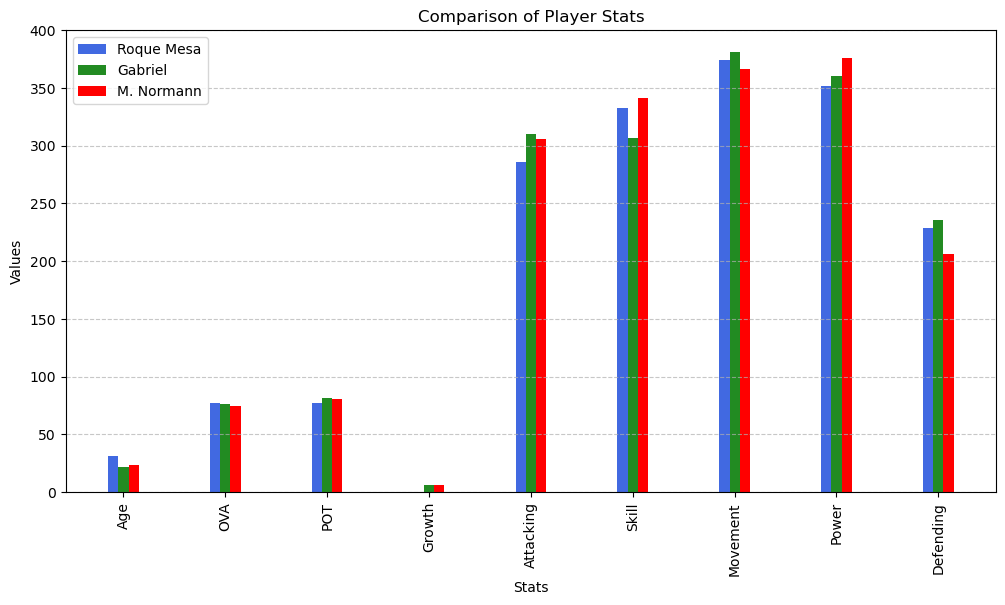

In [51]:
players_to_comp_ID = [4320, 5056, 7204]
players_to_comp_name = ['Roque Mesa', 'Gabriel', 'M. Normann']
colors = ['royalblue', 'forestgreen', 'red']
stat_columns = ["Age","OVA", "POT","Growth", "Attacking", "Skill", "Movement", "Power", "Defending"]
x = np.arange(len(stat_columns))
width = 0.1

plt.figure(figsize=(12, 6))
for i, player_id in enumerate(players_to_comp_ID):
    player_data = fifa_market_2021_df[fifa_market_2021_df.index == player_id].iloc[0]
    
    player_stats_values = [player_data[column] for column in stat_columns]

    x_player = x + i * width

    plt.bar(x_player, player_stats_values, width=width, label=players_to_comp_name[i], color=colors[i])

plt.xlabel('Stats')
plt.xticks(x + width * (len(players_to_comp_ID) - 1) / 2, stat_columns, rotation=90)
plt.ylabel('Values')
plt.title('Comparison of Player Stats')
plt.ylim(0, 400) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')

plt.show()

Subs for F. Vázquez:
Stats:
OVA - 77
BOV - 78
POT - 77
Growth - 0
Value - 7,5M
Attacking - 382
Skill - 391
Mov. - 273
Power - 342
Def. - 157

![Alt text](image-1.png)

We have this 2 options:
![Alt text](<Screenshot 2023-09-17 at 19.15.46.png>)

Compare this 2 players with F. Vásquez:

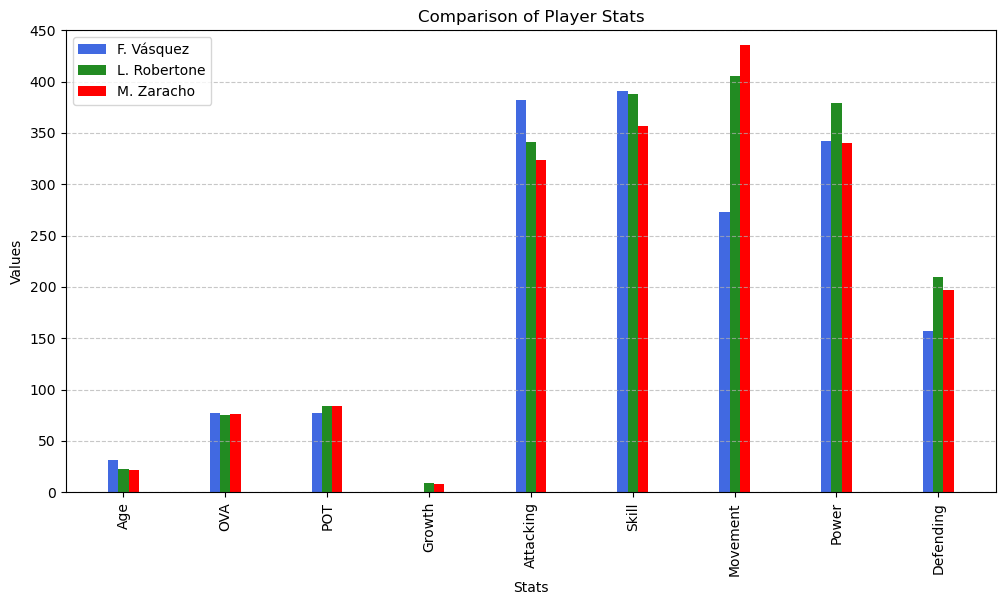

In [52]:
players_to_comp_ID_2 = [4799, 10145, 10396]
players_to_comp_name_2 = ['F. Vásquez', 'L. Robertone', 'M. Zaracho']
colors = ['royalblue', 'forestgreen', 'red']
stat_columns = ["Age","OVA", "POT","Growth", "Attacking", "Skill", "Movement", "Power", "Defending"]
x = np.arange(len(stat_columns))
width = 0.1

plt.figure(figsize=(12, 6))
for i, player_id in enumerate(players_to_comp_ID_2):
    player_data = fifa_market_2021_df[fifa_market_2021_df.index == player_id].iloc[0]
    
    player_stats_values = [player_data[column] for column in stat_columns]

    x_player = x + i * width

    plt.bar(x_player, player_stats_values, width=width, label=players_to_comp_name_2[i], color=colors[i])

plt.xlabel('Stats')
plt.xticks(x + width * (len(players_to_comp_ID_2) - 1) / 2, stat_columns, rotation=90)
plt.ylabel('Values')
plt.title('Comparison of Player Stats')
plt.ylim(0, 450) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')

plt.show()

Subs for Escudero:
Stats:
OVA - 80
BOV - 80
POT - 80
Growth - 0
Value - 11,5M
Attacking - 335
Skill - 360
Mov. - 365
Power - 359
Def. - 238
![Alt text](image-1.png)

We have this 2 options:
![Alt text](<Screenshot 2023-09-17 at 19.25.11.png>)

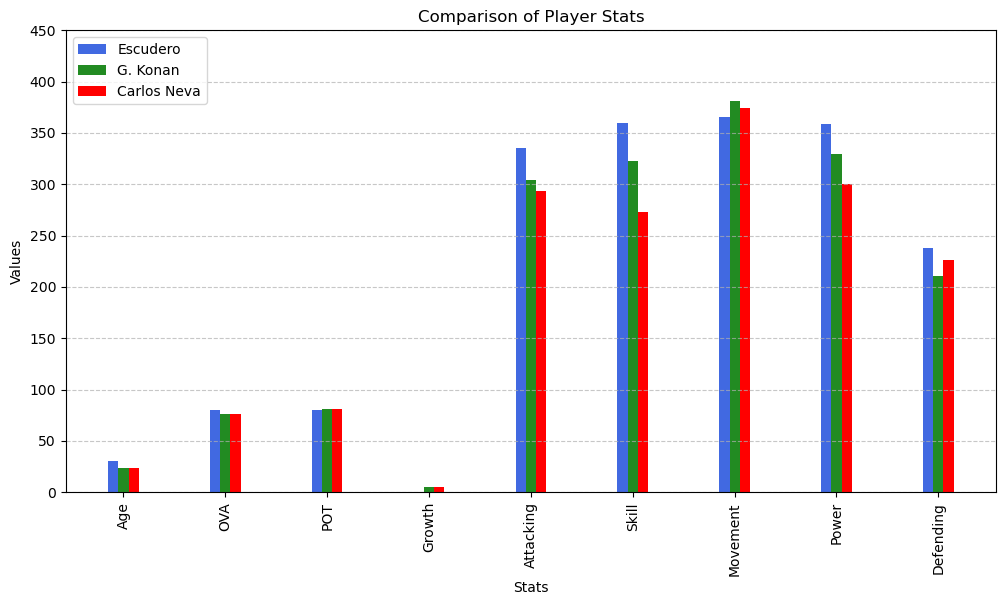

In [53]:
players_to_comp_ID_3 = [2845, 10317, 13791]
players_to_comp_name_3 = ['Escudero', 'G. Konan', 'Carlos Neva']
colors = ['royalblue', 'forestgreen', 'red']
stat_columns = ["Age","OVA", "POT","Growth", "Attacking", "Skill", "Movement", "Power", "Defending"]
x = np.arange(len(stat_columns))
width = 0.1

plt.figure(figsize=(12, 6))
for i, player_id in enumerate(players_to_comp_ID_3):
    player_data = fifa_market_2021_df[fifa_market_2021_df.index == player_id].iloc[0]
    
    player_stats_values = [player_data[column] for column in stat_columns]

    x_player = x + i * width

    plt.bar(x_player, player_stats_values, width=width, label=players_to_comp_name_3[i], color=colors[i])

plt.xlabel('Stats')
plt.xticks(x + width * (len(players_to_comp_ID_3) - 1) / 2, stat_columns, rotation=90)
plt.ylabel('Values')
plt.title('Comparison of Player Stats')
plt.ylim(0, 450) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')

plt.show()

Subs for S. Corchia:
Stats:
OVA - 75
BOV - 75
POT - 8075
Growth - 0
Value - 11.6M
Attacking - 337
Skill - 381
Mov. - 361
Power - 336
Def. - 226
![Alt text](image-1.png)

We have this 2 options:
![Alt text](<Screenshot 2023-09-17 at 19.31.34.png>)
![Alt text](<Screenshot 2023-09-17 at 19.32.28.png>)

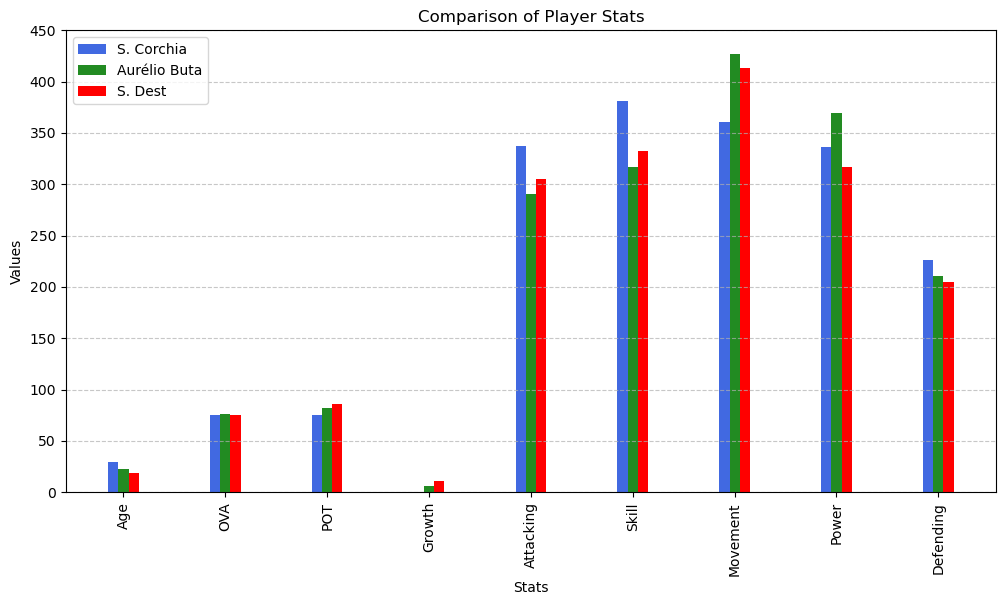

In [54]:
players_to_comp_ID_4 = [2698, 10006, 14771]
players_to_comp_name_4 = ['S. Corchia', 'Aurélio Buta', 'S. Dest']
colors = ['royalblue', 'forestgreen', 'red']
stat_columns = ["Age","OVA", "POT","Growth", "Attacking", "Skill", "Movement", "Power", "Defending"]
x = np.arange(len(stat_columns))
width = 0.1

plt.figure(figsize=(12, 6))
for i, player_id in enumerate(players_to_comp_ID_4):
    player_data = fifa_market_2021_df[fifa_market_2021_df.index == player_id].iloc[0]
    
    player_stats_values = [player_data[column] for column in stat_columns]

    x_player = x + i * width

    plt.bar(x_player, player_stats_values, width=width, label=players_to_comp_name_4[i], color=colors[i])

plt.xlabel('Stats')
plt.xticks(x + width * (len(players_to_comp_ID_4) - 1) / 2, stat_columns, rotation=90)
plt.ylabel('Values')
plt.title('Comparison of Player Stats')
plt.ylim(0, 450) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')

plt.show()

**We now want to play a little more with data, and see which of the position pays the best**

Again, we read the dataset and keep the columns we want, standardize columns names, and use the fonction convert_value to convert value, wage and release clause

In [55]:
fifa_df = pd.read_csv("fifa21_male2.csv")
fifa_wage_position = fifa_df[[
    "Name", "Age", "Club", "OVA", "BOV", "BP", "POT", "Growth", "Contract", "Value", "Wage", "Release Clause", ]]

In [56]:
fifa_wage_position.columns = [fifa_wage_position.columns[i].lower().replace(' ','_') for i in range(len(fifa_wage_position.columns))]

In [57]:
fifa_wage_position["value"] = fifa_wage_position["value"].apply(convert_value)
fifa_wage_position["wage"] = fifa_wage_position["wage"].apply(convert_value)
fifa_wage_position["release_clause"] = fifa_wage_position["release_clause"].apply(convert_value)

In [58]:
fifa_wage_position

,name,age,club,ova,bov,bp,pot,growth,contract,value,wage,release_clause
0,G. Pasquale,33,Udinese,69,71,LWB,69,0,2008 ~ 2016,625000.00,7000.00,0.00
1,Luis García,37,KAS Eupen,71,70,CM,71,0,2014 ~ 2019,600000.00,7000.00,1100000.00
2,J. Cole,33,Coventry City,71,71,CAM,71,0,2016 ~ 2020,1100000.00,15000.00,0.00
3,D. Yorke,36,Sunderland,68,70,ST,82,14,2009,0.00,0.00,0.00
4,Iniesta,36,Vissel Kobe,81,82,CAM,81,0,2018 ~ 2021,5500000.00,12000.00,7200000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,CD Tondela,64,66,CB,69,5,"Jun 30, 2021 On Loan",550000.00,2000.00,0.00
17121,W. Rickard,18,Burnley,56,58,CAM,66,10,2020 ~ 2021,130000.00,3000.00,273000.00
17122,C. Barrett,18,Burnley,56,56,RB,67,11,2020 ~ 2022,130000.00,2000.00,273000.00
17123,J. Gazibegović,20,SK Sturm Graz,62,62,RB,73,11,2020 ~ 2023,475000.00,3000.00,784000.00


We will now fill create the new columns contract end the same way as before

In [60]:
fifa_wage_position[['Contract start', "contract_end"]] = fifa_wage_position['contract'].str.split('~', expand=True)
fifa_wage_position = fifa_wage_position.drop('contract', axis=1)
fifa_wage_position = fifa_wage_position.drop('Contract start', axis=1)
fifa_wage_position['contract_end'].fillna(2021, inplace = True)
fifa_wage_position['contract_end'] = fifa_wage_position['contract_end'].astype(int)
fifa_wage_position

,name,age,club,ova,bov,bp,pot,growth,value,wage,release_clause,contract_end
0,G. Pasquale,33,Udinese,69,71,LWB,69,0,625000.00,7000.00,0.00,2016
1,Luis García,37,KAS Eupen,71,70,CM,71,0,600000.00,7000.00,1100000.00,2019
2,J. Cole,33,Coventry City,71,71,CAM,71,0,1100000.00,15000.00,0.00,2020
3,D. Yorke,36,Sunderland,68,70,ST,82,14,0.00,0.00,0.00,2021
4,Iniesta,36,Vissel Kobe,81,82,CAM,81,0,5500000.00,12000.00,7200000.00,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,CD Tondela,64,66,CB,69,5,550000.00,2000.00,0.00,2021
17121,W. Rickard,18,Burnley,56,58,CAM,66,10,130000.00,3000.00,273000.00,2021
17122,C. Barrett,18,Burnley,56,56,RB,67,11,130000.00,2000.00,273000.00,2022
17123,J. Gazibegović,20,SK Sturm Graz,62,62,RB,73,11,475000.00,3000.00,784000.00,2023


Let's try to visualize the wage of each position

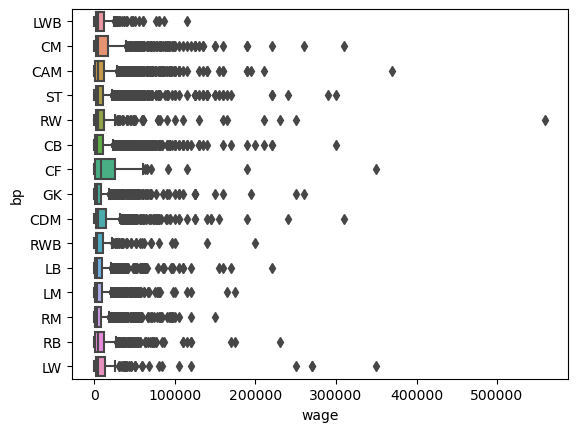

In [61]:
sns.boxplot(y=fifa_wage_position.bp, x=fifa_wage_position.wage)
plt.show()

We see that the core of wages is really low compare to some outlier. We will forget about the really high wages and focus on wages below 100000€

In [62]:
fifa_wage_position_filtered = fifa_wage_position[fifa_wage_position['wage'] < 100000]
fifa_wage_position_filtered.shape

(16956, 12)

We still have a lot of players

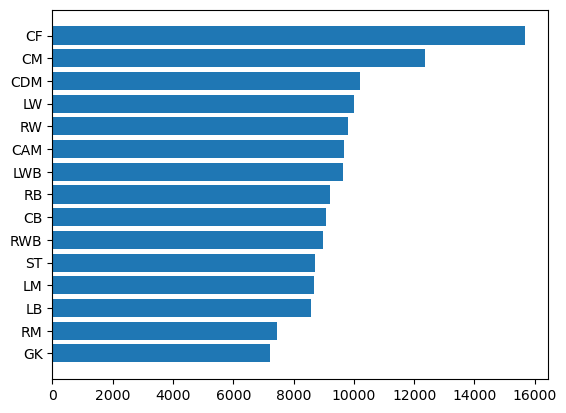

In [63]:
fifa_mean_wage_position_filtered = fifa_wage_position_filtered.groupby('bp').mean().reset_index().sort_values(by = 'wage')
plt.barh(fifa_mean_wage_position_filtered.bp, width=fifa_mean_wage_position_filtered.wage)
plt.show()

We can see that attack oriented position are occuping the top3 for wages, and on the opposite, defending oriented position and goal keeper have a much lower salary